## A statistical paradox : illustration

This is a small, all-theoretical illustration of a well-known statistical paradox : surveys biases due to changes of the underlying sample. My model and data are entirely fake and were generated for the purpose of this notebook.

The paradox is the following : the average income of farmers in France from 1990 to 2019 has steadily grown from around 18000€ a year in 1990 to nearly 28000€ a year in 2019. However, nearly all farmers have seen their income decrease by around 0.5% a year, so nearly 14% in total. How is it possible ?

In [239]:
1-(0.995**30)

0.13961580808530394

I will illustrate this with a toy database.

In [241]:
import pandas as pd
import numpy as np
np.random.seed(1)
n=2500 #nombre d'exploitations
year_inf, year_sup = 1990, 2020
rev_inf, rev_sup = 10000, 60000

Let's take 2500 farms, whose revenue in year 1990 are distributed from 10000€ to 60000€ on the following beta distribution :

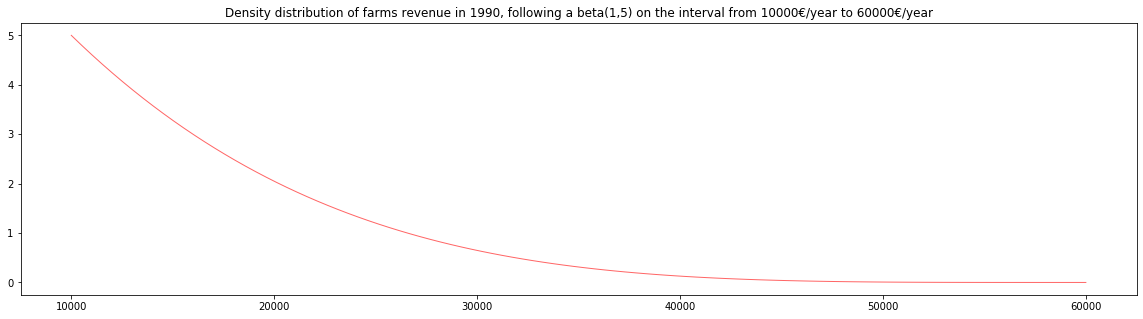

In [242]:
from scipy.stats import beta
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 5))
a, b = 1,5
x = np.linspace(0,1, 100)
X=[rev_inf+(rev_sup-rev_inf)*xx for xx in x]
ax.plot(X, [beta.pdf(xx,a,b) for xx in x],'r-', lw=1, alpha=0.6, label='beta pdf')
ax.set_title(f"Density distribution of farms revenue in {year_inf}, following a beta(1,5) on the interval from {rev_inf}€/year to {rev_sup}€/year")
plt.show()

Let's generate them and look at our actual data.

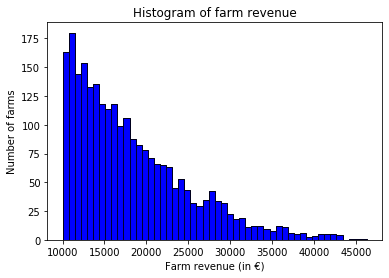

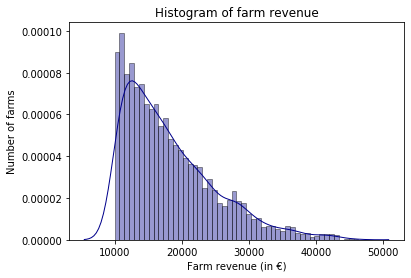

In [243]:
import seaborn as sns

toy_dataset=pd.DataFrame(columns=[str(year) for year in range(year_inf,year_sup)])
toy_dataset[str(year_inf)] = np.rint(rev_inf+(rev_sup-rev_inf)*np.random.beta(a=a,b=b,size=n))

# matplotlib histogram
plt.hist(toy_dataset[str(year_inf)], color = 'blue', edgecolor = 'black', bins = 50)

# seaborn histogram
sns.distplot(toy_dataset[str(year_inf)], hist=True, kde=False,  bins=50, color = 'blue',  hist_kws={'edgecolor':'black'})

# Add labels
plt.title('Histogram of farm revenue')
plt.xlabel('Farm revenue (in €)')
plt.ylabel('Number of farms')
plt.show()

# Density Plot and Histogram of all arrival delays
sns.distplot(toy_dataset[str(year_inf)], hist=True, kde=True, bins=50, color = 'darkblue', hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
# Add labels
plt.title('Histogram of farm revenue')
plt.xlabel('Farm revenue (in €)')
plt.ylabel('Number of farms')
plt.show()

We will make the assumption that, if a farm's revenue fall under 10000€ a year, the farm goes bankrupt. We will also consider that each farm has the same revenue growth rate during all the 2000-2019 period, that we will generate randomly and independently from a $\mathcal{N}(-0.5,2.5)$, so that the mean growth rate among all farmers is -0.5% a year, but has individual variabilities.

In [244]:
growth_rate=np.random.normal(loc=-0.5,scale=2.5,size=n)
print(f"Baisse annuelle moyenne des revenus des agriculteurs : {round(np.mean(growth_rate),2)}%")
print(f"Baisse annuelle moyenne des revenus des agriculteurs, pondérée par la taille de l'exploitation : {np.round(np.average(growth_rate,weights=toy_dataset[str(year_inf)]),2)}%")
for year in range(year_inf+1,year_sup):
    toy_dataset[str(year)] = (toy_dataset[str(year-1)]*(1+0.01*growth_rate)).apply(lambda a: int(a) if pd.notnull(a) else a)
    toy_dataset.loc[toy_dataset[str(year)]<10000,str(year)]=np.nan
toy_dataset.head(20)

Baisse annuelle moyenne des revenus des agriculteurs : -0.49%
Baisse annuelle moyenne des revenus des agriculteurs, pondérée par la taille de l'exploitation : -0.47%


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,17334.0,16806.0,16294.0,15797.0,15316.0,14849.0,14396.0,13957.0,13532.0,13120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12597.0,12578.0,12559.0,12540.0,12521.0,12502.0,12483.0,12464.0,12445.0,12426.0,...,12217.0,12198.0,12179.0,12160.0,12141.0,12122.0,12103.0,12084.0,12065.0,12046.0
2,24848.0,24266.0,23697.0,23142.0,22600.0,22070.0,21553.0,21048.0,20555.0,20073.0,...,15464.0,15101.0,14747.0,14401.0,14063.0,13733.0,13411.0,13097.0,12790.0,12490.0
3,11466.0,11029.0,10608.0,10204.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10452.0,10562.0,10674.0,10787.0,10901.0,11016.0,11132.0,11250.0,11369.0,11489.0,...,12898.0,13034.0,13172.0,13311.0,13452.0,13594.0,13738.0,13883.0,14030.0,14178.0
5,10773.0,10999.0,11230.0,11466.0,11707.0,11953.0,12204.0,12460.0,12722.0,12989.0,...,16327.0,16670.0,17020.0,17378.0,17743.0,18116.0,18497.0,18886.0,19283.0,19688.0
6,20031.0,20020.0,20009.0,19998.0,19987.0,19976.0,19965.0,19954.0,19943.0,19932.0,...,19811.0,19800.0,19789.0,19778.0,19768.0,19758.0,19748.0,19738.0,19728.0,19718.0
7,10792.0,10634.0,10478.0,10325.0,10174.0,10025.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11525.0,11834.0,12151.0,12477.0,12811.0,13154.0,13507.0,13869.0,14241.0,14623.0,...,19560.0,20084.0,20622.0,21175.0,21743.0,22326.0,22925.0,23540.0,24171.0,24819.0
9,20422.0,21280.0,22174.0,23105.0,24075.0,25086.0,26140.0,27238.0,28382.0,29574.0,...,46503.0,48457.0,50493.0,52614.0,54824.0,57127.0,59527.0,62028.0,64634.0,67349.0


The farms that have gown bankrupt only have *NaN* revenue values from the year of their bankruptcy.

Now, let's take a look at the mean income of farmers year by year :

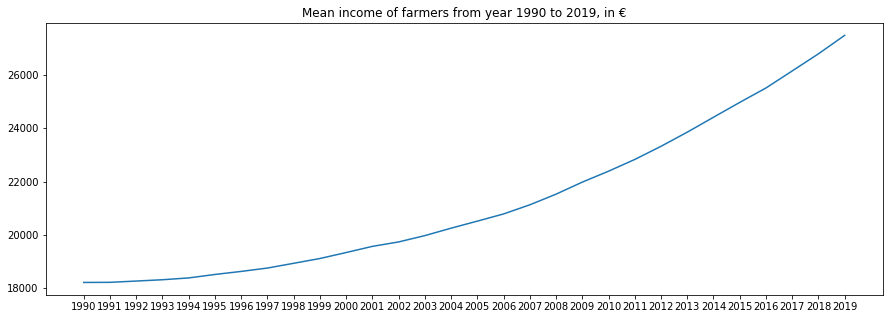

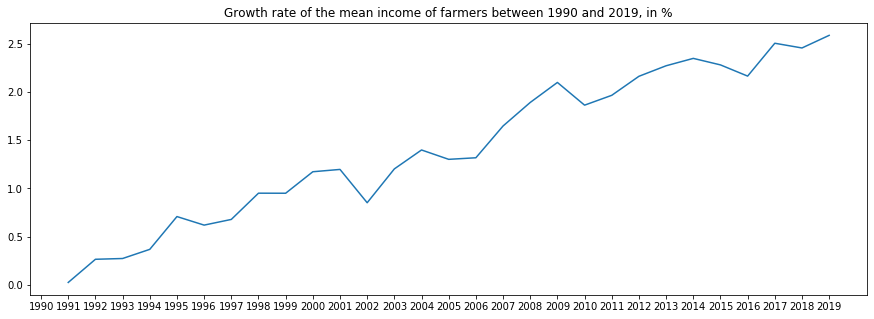

In [245]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(toy_dataset.mean(axis=0,skipna=True))
plt.title(f"Mean income of farmers from year {year_inf} to {year_sup-1}, in €")
plt.show()
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(toy_dataset.mean(axis=0,skipna=True).pct_change()*100)
plt.title(f"Growth rate of the mean income of farmers between {year_inf} and {year_sup-1}, in %")
plt.show()

Not only is the growth rate of the mean income always positive, it is also increasing ! And the mean revenue is exponentially increasing ! How is that possible ?

In fact, it is very simple. \textbf{Your sample changes over years.} Each year, you remove from the sample all values that fall under the threshold of 10000€ - that is to say, the smallest values of the sample, and you keep only the others. So, even if nearly all revenues of those bigger farms have actually decreased, removing all the smallest values from your mean calculation make it artificially increase.

Now let's add a new hypothesis : we will suppose that each time a farm goes bankrupt, it is bought by a larger neighbour (for simplicity we will take the nearest non-bankrupt row, assuming the identifiers are geographical). This larger farm can then benefit from economies of scale, and the marginal additional income it gets from the bought farm is 1.5 times the income this farm had when managed alone. The buyer will then have to pay 10000€ per year during 10 years to the previous farmer for buying his farm. If he goes bankrupt himself, his buyer will pay him 10000€ for 10 years, and end the reimbursement of his debt.

In [246]:
import copy
#the dataframe actual_values will keep track of the inherent values of each farm, without bankruptcy of additional bought farms
actual_values=copy.deepcopy(toy_dataset[[str(year_inf)]])
actual_values['counter'] = 0 #only interesting if mask is true, it counts the number of years it has been bankrupt so far
actual_values['mask'] = False #True is the row has gone bankrupt so far, initially false for all
actual_values['is_in_farm'] = actual_values.index.values #this is theindex of the farm that owns this row. Initially it is itself.

for year in range(year_inf+1,year_sup): #year by year we actualize values of farms and put some in bankruptcy

    actual_values[str(year)] = (actual_values[str(year-1)]*(1+0.01*growth_rate)).apply(lambda a: int(a) if pd.notnull(a) else a)
    #we actualize the underlying value of each individual farm by its own growthrate.
    
    #first, we have to calculate the values each farm would have, to know which ones will go bankrupt
    toy_dataset[str(year)] = copy.deepcopy(actual_values[str(year)].values)
    #counting the fusion for the farms that have already gone bankrupt in the past, to have the real revenues of each farm
    for ind,row in actual_values.loc[actual_values['mask'],:].iterrows():
        toy_dataset.loc[ind,str(year)] = (10000 if row['counter'] <10 else np.nan)
        toy_dataset.loc[row['is_in_farm'],str(year)] += 1.5*row[str(year)]
        if row['counter'] <10:
            toy_dataset.loc[row['is_in_farm'],str(year)] -= 10000
            
    #now we can actualize the mask for the farms that have gone bankrupt in this period :
    actual_values.loc[toy_dataset[str(year)]<10000,'mask'] = True
    
    #here we recalculate the buying for all farms. Not efficient but then we are sure it is right.
    for ind in actual_values[actual_values['mask']].index.values:
        r=copy.deepcopy(ind)
        while actual_values['mask'].iloc[r]:
            r=r-1
        actual_values.loc[ind,'is_in_farm'] = (r if r>=0 else r+n)
    
    #we have to redo the calculation of revenues, with the actual updated mask and fusions
    toy_dataset[str(year)] = copy.deepcopy(actual_values[str(year)].values)
    for ind,row in actual_values.loc[actual_values['mask'],:].iterrows():
        toy_dataset.loc[ind,str(year)] = (10000 if row['counter'] <10 else np.nan)
        toy_dataset.loc[row['is_in_farm'],str(year)] += 1.5*row[str(year)]
        if row['counter'] <10:
            toy_dataset.loc[row['is_in_farm'],str(year)] -= 10000

    #we have to increment the counter for the bankrupted farms
    actual_values.loc[actual_values['mask'],'counter'] +=1
       
toy_dataset.head(20)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,17334.0,16806.0,16294.0,15797.0,15316.0,14849.0,14396.0,13957.0,13532.0,13120.0,...,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,NaN,NaN
1,12597.0,12578.0,12559.0,12540.0,12521.0,12502.0,12483.0,12464.0,12445.0,12426.0,...,12217.0,12198.0,12179.0,12160.0,12141.0,12122.0,12103.0,12084.0,12065.0,12046.0
2,24848.0,24266.0,23697.0,23142.0,27322.5,26231.5,25174.5,24150.5,23158.0,22196.0,...,23367.5,22703.0,22058.0,21433.0,20826.5,20238.5,19667.5,19115.0,18578.5,18058.0
3,11466.0,11029.0,10608.0,10204.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10452.0,10562.0,10674.0,10787.0,10901.0,11016.0,11132.0,11250.0,11369.0,11489.0,...,12898.0,13034.0,13172.0,13311.0,13452.0,13594.0,13738.0,13883.0,14030.0,14178.0
5,10773.0,10999.0,11230.0,11466.0,11707.0,11953.0,12204.0,12460.0,12722.0,12989.0,...,16327.0,16670.0,17020.0,17378.0,17743.0,18116.0,18497.0,18886.0,19283.0,19688.0
6,20031.0,20020.0,20009.0,19998.0,19987.0,19976.0,24782.0,24553.5,24329.5,24108.5,...,31866.5,31678.5,31493.5,31311.5,31132.0,30955.5,30782.0,30610.0,30441.0,30273.5
7,10792.0,10634.0,10478.0,10325.0,10174.0,10025.0,10000.0,10000.0,10000.0,10000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11525.0,11834.0,12151.0,12477.0,12811.0,13154.0,13507.0,13869.0,14241.0,14623.0,...,19560.0,20084.0,20622.0,21175.0,21743.0,22326.0,22925.0,23540.0,24171.0,24819.0
9,20422.0,21280.0,22174.0,23105.0,24075.0,25086.0,26140.0,27238.0,28382.0,29574.0,...,46503.0,48457.0,50493.0,52614.0,54824.0,57127.0,59527.0,62028.0,64634.0,67349.0


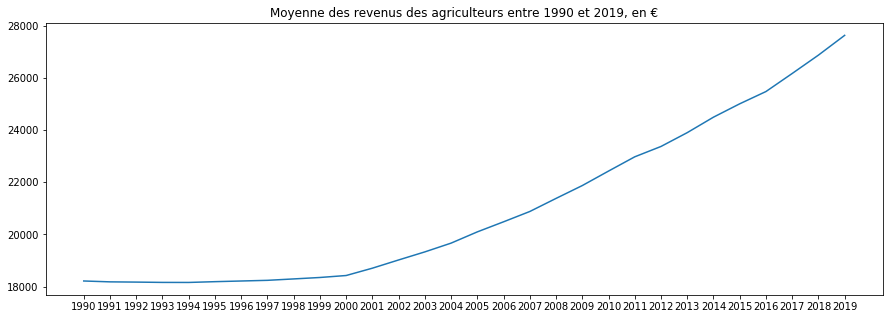

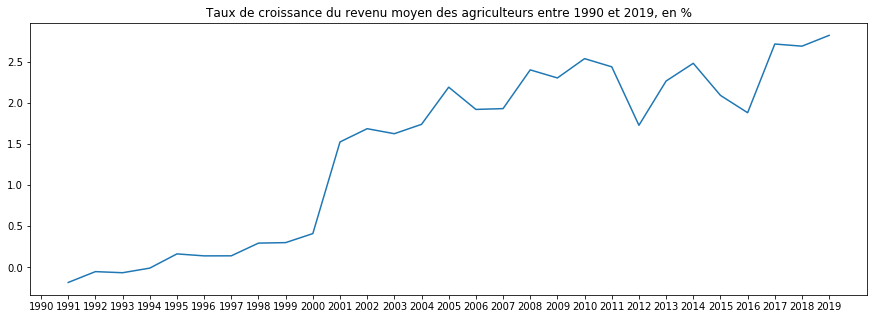

In [247]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(toy_dataset.mean(axis=0,skipna=True))
plt.title(f"Moyenne des revenus des agriculteurs entre {year_inf} et {year_sup-1}, en €")
plt.show()
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(toy_dataset.mean(axis=0,skipna=True).pct_change()*100)
plt.title(f"Taux de croissance du revenu moyen des agriculteurs entre {year_inf} et {year_sup-1}, en %")
plt.show()

In [252]:
actual_values.is_in_farm.value_counts().value_counts()

1    1201
2     462
3      93
4      15
5       6
6       1
Name: is_in_farm, dtype: int64

In the end, we only have 1201 farms, so less than the half, that are still independent. One farm even bought 5 others (by buying farms that had bought others, probably). On the evolution of mean revenue, we very well see the cause of the paradox !